In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rc('font', family='Malgun Gothic')

In [2]:
# noise: gaussian standadard deviation
X,y=make_moons(n_samples=500,noise=0.1,random_state=42)

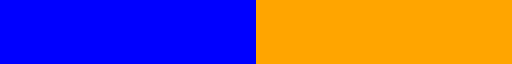

In [3]:
cmap=ListedColormap(['blue','orange'])
cmap

C:\Users\pmsda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


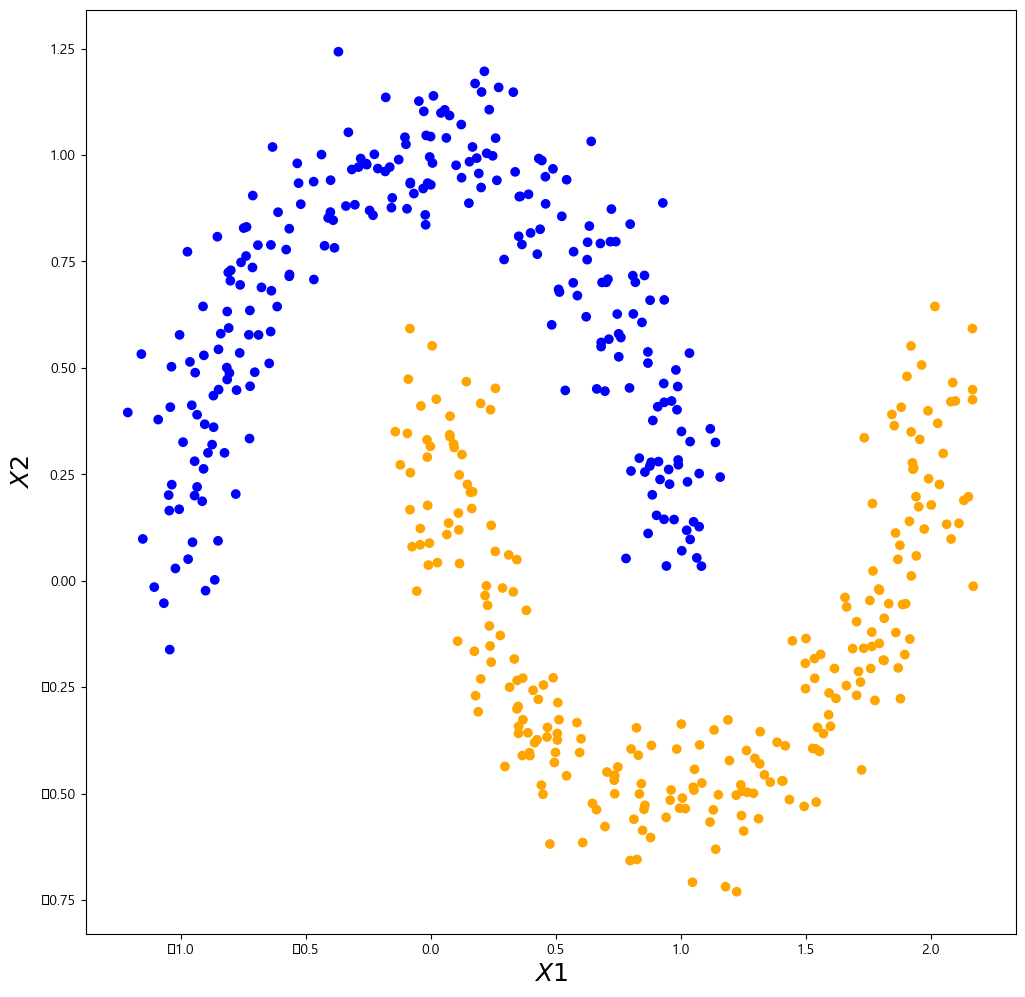

In [4]:
fig=plt.figure(figsize=(12,12))
plt.scatter(X[:,0],X[:,1],cmap=cmap,c=y)
plt.xlabel('$X1$',fontsize=18)
plt.ylabel('$X2$',fontsize=18)
plt.show()

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [7]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

acc_train=accuracy_score(y_train,y_train_pred)
acc_test=accuracy_score(y_test,y_test_pred)

print(acc_train,acc_test)

0.925 0.91


Regression

In [8]:
from sklearn.tree import DecisionTreeRegressor

$ y=sin(x) +εN(0,0.5^2)  $

In [9]:
X=np.random.rand(500,1)*10
X=np.sort(X,axis=0)
y = np.sin(X).reshape(-1, ) + np.random.randn(500) * 0.5

C:\Users\pmsda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


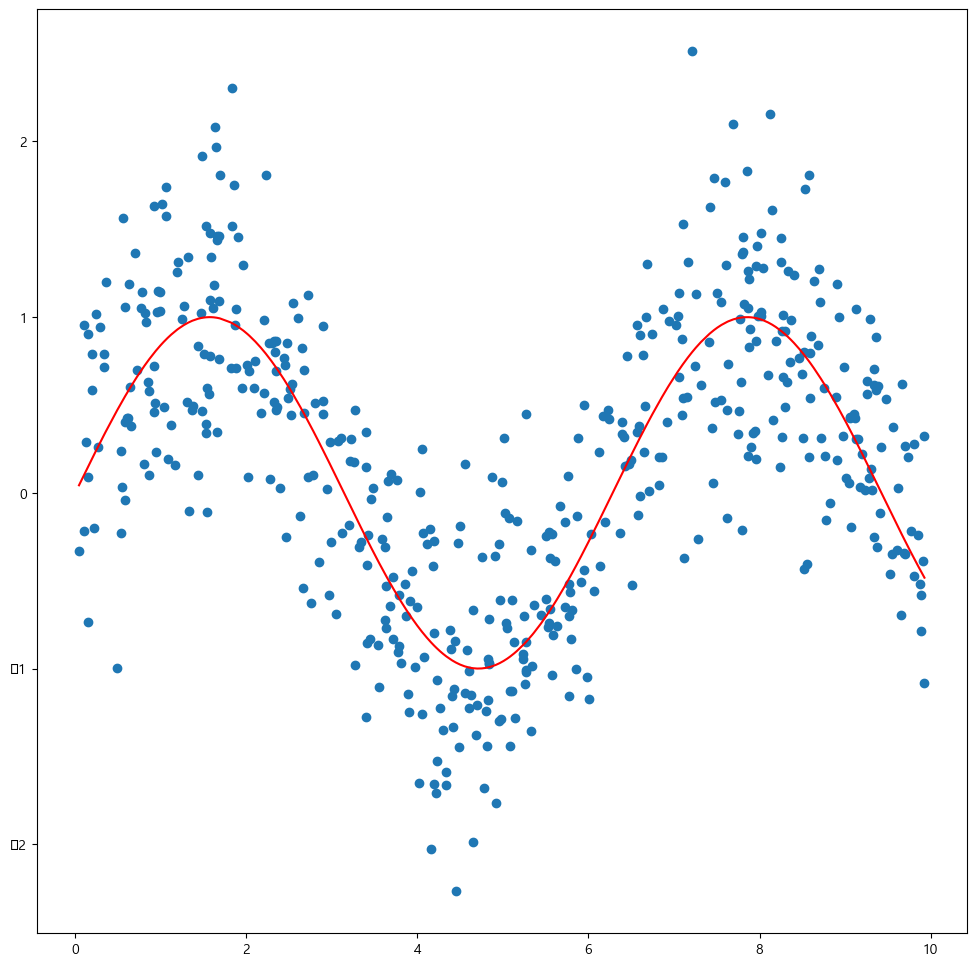

In [10]:
plt.figure(figsize=(12,12))
plt.scatter(X,y)
plt.plot(X,np.sin(X),c='red')
plt.show()

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
idx = np.argsort(X_test,axis=0).reshape(-1)
X_test , y_test = X_test[idx] , y_test[idx]

model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

C:\Users\pmsda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


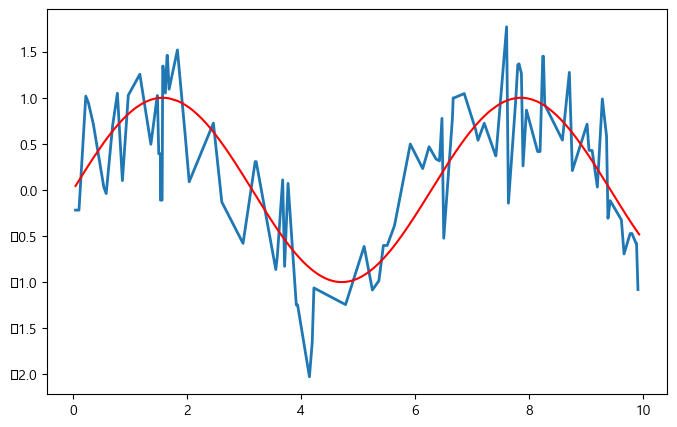

In [12]:
y_test_pred=model.predict(X_test)
plt.figure(figsize=(8,5))
plt.plot(X_test,y_test_pred,linewidth=2,label='predicted')
plt.plot(X,np.sin(X),c='red',label='$sin(X)$')
plt.show()

In [13]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_pred=model.predict(X_train) , y_true = y_train) 
test_r2 = r2_score(y_pred= y_test_pred, y_true = y_test)
print(train_r2,test_r2)

1.0 0.2183375117053683
